# LOAD package

In [1]:
from astropy.io import fits
import numpy as np
from astropy.table import Table,Column
from astropy.table import Table,Column,vstack,hstack
import numpy as np
import os
import astropy.units as u
import matplotlib.pyplot as plt

In [2]:
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM,z_at_value
cosmo = FlatLambdaCDM(H0 = 67.74,Om0 = 0.3089,Ob0 = 0.0486)
from scipy.spatial import cKDTree
import astropy.units as u

In [3]:
pwd

'/home/yunzheng/PAC_newtry/0_0.2'

# check input

## spec catalogue

In [3]:
spec = Table.read("/home/yunzheng/PAC/code/sdss/spec/spec_catalogue/spec.fits")
out = Table.read("/home/yunzheng/PAC/code/sdss/spec/SEDfitting/out/results.fits")

In [4]:
spec     #483541

OBJECT_POSITION,RA_1,DEC_1,M,MMAX,ILSS,IWINDOW,LETTER_MASK,ABSM [8],Z_1,RA_2,DEC_2,ABMAGGIES [8],ABMAGGIES_IVAR [8],Z_2,ABSMAG [8],ABSMAG_IVAR [8],KCORRECT [8],MTOL [8],MASS,INTSFH,METS,B300,B1000,COEFFS [5],Separation_1,SDSS_IMAGING_TAG,SDSS_IMAGING_TAG_PRIMARY,RUN,RERUN,CAMCOL,FIELD,ID,RA,DEC,NCHILD,RESOLVE_STATUS,FLAGS [5],FLAGS2 [5],OBJC_ROWC,OBJC_COLC,COLC [5],OBJC_FLAGS,OBJC_FLAGS2,SKYFLUX [5],MODELFLUX [5],MODELFLUX_IVAR [5],PETROFLUX [5],PETROFLUX_IVAR [5],FIBERFLUX [5],PSFFLUX [5],PSFFLUX_IVAR [5],PETROR50 [5],PETROR90 [5],EXTINCTION [5],NMGYPERCOUNT [5],VAGC_SELECT,PSP_SKYFLUX [5],CALIBOBJ_POSITION,SCORE,CALIB_STATUS [5],IFIELD,BALKAN_ID,FRACPSF [5],DEVFLUX [5],DEVFLUX_IVAR [5],EXPFLUX [5],EXPFLUX_IVAR [5],Separation
,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec
int32,float64,float64,float32,float32,int32,int32,int32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int32,int32,bytes3,int32,int32,int32,float64,float64,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,int32,float32,int32,int32,int32,float32,float32,float32,float32,float32,float64
35938,240.61926903302074,-0.41455031517237634,17.362568,17.6,84579,6120,95,-19.362528 .. inf,0.121428795,240.61926903302074,-0.41455031517237634,2.5539594e-08 .. 0.0,3.0424672e+17 .. 0.0,0.121428795,-19.151924 .. -21.96305,168.34694 .. 0.0,0.14085416 .. -0.20362368,1.0990384 .. 0.25503954,17699060000.0,31478518000.0,0.03308003,0.0043511386,0.29644465,7.630832e-06 .. 1.5157643e-07,0.0,35939,35939,727,137,3,48,549,240.61926903302074,-0.41455031517237634,0,257,268469504 .. 402685952,64 .. 64,717,159,164 .. 161,268435712,16,1.0776613 .. 26.273832,12.385936 .. 162.60155,2.2336664 .. 0.10341513,18.88073 .. 162.37744,0.49929833 .. 0.021563886,3.6513827 .. 50.67072,3.7190983 .. 41.86921,13.532671 .. 0.6224216,8.140881 .. 5.066332,17.535732 .. 12.403873,0.7497129 .. 0.21509704,0.0076585943 .. 0.035764452,7,1.0237527 .. 26.522518,1,0.84747005,1 .. 1,25639,2994687,1.0 .. 0.55031127,42.606163 .. 230.79245,0.2199813 .. 0.05169117,17.995966 .. 151.80385,1.1203996 .. 0.119173646,0.0
35939,241.12198661864258,-0.4169245807319409,16.087635,17.6,84597,6093,95,-16.921232 .. -19.794912,0.03128761,241.12198661864258,-0.4169245807319409,7.20521e-08 .. 8.725794e-07,6.231279e+16 .. 42277430000000.0,0.03128761,-17.109905 .. -19.69951,274.42386 .. 27.306738,0.05337054 .. -0.064921275,1.5726041 .. 0.44180238,3916717300.0,7375960600.0,0.02288083,0.00013741075,0.04973215,3.270848e-06 .. 1.7804147e-10,0.0,35940,35940,727,137,3,51,545,241.12198661864258,-0.4169245807319409,0,257,268468224 .. 268468224,64 .. 64,1208,138,142 .. 139,268566528,16,1.0502024 .. 26.169886,37.310085 .. 541.50073,0.74023753 .. 0.026486445,39.75801 .. 531.68555,0.17777878 .. 0.007214771,4.543627 .. 80.93123,4.422738 .. 57.127,11.37216 .. 0.44077623,9.667 .. 8.706061,19.137146 .. 21.33479,0.678551 .. 0.19468029,0.0076852897 .. 0.03584248,7,1.0207808 .. 26.363611,2,0.8262016,1 .. 1,25642,12027,0.0 .. 0.07379254,82.89318 .. 879.2147,0.13739562 .. 0.009434024,43.177666 .. 529.81384,0.56113154 .. 0.027680026,0.0
35943,242.78739675708056,-0.4143892086148429,17.56414,17.6,84627,6076,95,-18.975706 .. inf,0.18288562,242.78739675708056,-0.4143892086148429,6.0143504e-09 .. 0.0,7.3383406e+17 .. 0.0,0.18288562,-19.133121 .. -23.045462,22.517836 .. 0.0,0.7195904 .. -0.30759364,3.1201758 .. 0.32533598,61184135000.0,112313400000.0,0.029060565,2.7024447e-07,0.17249276,6.968636e-06 .. 1.4542216e-11,0.0,35944,35944,727,137,3,62,531,242.78739675708056,-0.4143892086148429,0,257,142639377 .. 268468240,2621440 .. 524352,1391,160,164 .. 161,268566800,16,1.0633068 .. 25.614803,3.2828605 .. 181.919,2.6099608 .. 0.09265355,4.585024 .. 149.89496,0.3691967 .. 0.0133691635,0.9378692 .. 56.237686,0.9354516 .. 55.31267,1

In [24]:
out

id,bayes.param.restframe_Lnu(DECam.g),bayes.param.restframe_Lnu(DECam.g)_err,bayes.param.restframe_Lnu(DECam.r),bayes.param.restframe_Lnu(DECam.r)_err,bayes.param.restframe_Lnu(sdss.gp),bayes.param.restframe_Lnu(sdss.gp)_err,bayes.param.restframe_Lnu(sdss.rp),bayes.param.restframe_Lnu(sdss.rp)_err,bayes.param.restframe_Lnu(sdss.up),bayes.param.restframe_Lnu(sdss.up)_err,bayes.param.restframe_Lnu(subaru.hsc.g),bayes.param.restframe_Lnu(subaru.hsc.g)_err,bayes.param.restframe_Lnu(subaru.hsc.r),bayes.param.restframe_Lnu(subaru.hsc.r)_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.subaru.hsc.g,bayes.subaru.hsc.g_err,bayes.subaru.hsc.r,bayes.subaru.hsc.r_err,best.chi_square,best.reduced_chi_square,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.subaru.hsc.g,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.param.restframe_DECam.g-DECam.r,best.param.restframe_sdss.gp-sdss.rp,best.param.restframe_sdss.up-sdss.rp,best.param.restframe_subaru.hsc.g-subaru.hsc.r,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.param.restframe_Lnu(DECam.g),best.param.restframe_Lnu(DECam.r),best.param.restframe_Lnu(sdss.gp),best.param.restframe_Lnu(sdss.rp),best.param.restframe_Lnu(sdss.up),best.param.restframe_Lnu(subaru.hsc.g),best.param.restframe_Lnu(subaru.hsc.r),best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.sdss.up,best.sdss.gp,best.sdss.rp,best.sdss.ip,best.sdss.zp
,W,W,W,W,W,W,W,W,W,W,W,W,W,W,solMass,solMass,mJy,mJy,mJy,mJy,,,mag,mag,mag,mag,mag,mag,,,mag,,nm,nm,,,km / s,,mag,mag,mag,mag,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,mag,mag,mag,mag,mag,mag,W,W,W,W,W,W,W,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,1.1174957538699337e+22,5.5874787693496684e+20,1.8406557446467005e+22,9.203278723233503e+20,1.072021523433129e+22,5.360107617165645e+20,1.7682763597768615e+22,8.841381798884308e+20,4.0836062637061487e+21,2.8754783542363793e+20,1.1086581016465712e+22,5.543290508232856e

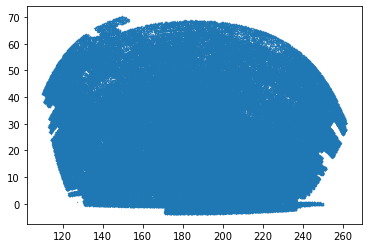

In [6]:
plt.scatter(spec['RA_1'],spec['DEC_1'],s =0.1)

In [5]:
ra = spec['RA_1']
dec = spec['DEC_1']
Z = spec['Z_1']
mass = np.log10(out['bayes.stellar.m_star'])

In [6]:
target = Table()
target.add_column(Column(name = 'ra',length = len(Z),dtype = 'f8',data = ra))
target.add_column(Column(name = 'dec',length = len(Z),dtype = 'f8',data = dec))
target.add_column(Column(name = 'Z',length = len(Z),dtype = 'f8',data = Z))
target.add_column(Column(name = 'mass',length = len(Z),dtype = 'f8',data = mass))

In [7]:
target   #483541

ra,dec,Z,mass
,,,solMass
float64,float64,float64,float64
240.61926903302074,-0.41455031517237634,0.12142879515886307,10.38003652373513
241.12198661864258,-0.4169245807319409,0.03128761053085327,9.668534755098246
242.78739675708056,-0.4143892086148429,0.18288561701774597,11.02818388721621
241.64676542212945,0.0005700952381056487,0.05686069652438164,9.673630469179098
243.9073822840212,0.002406341566279448,0.06540031731128693,9.92287165823289
244.102213631415,0.0026139051963218174,0.07115377485752106,9.820392518282116
244.66825692610283,0.002178546345701705,0.0791817381978035,9.993731189487825
244.94439672008693,0.004490992297466728,0.1531338095664978,11.129692928198281


### redshift cut and mass cut

In [8]:
index = (Z<=0.2)
target = target[index]
index = (target['mass']>=11.3)
target = target[index]

In [9]:
target    #12131

ra,dec,Z,mass
,,,solMass
float64,float64,float64,float64
177.15498032821907,-1.2128336375352053,0.10672887414693832,11.522425444955052
179.6707547879201,-1.0667384957142532,0.13116420805454254,11.61586976692139
184.56657701894275,-1.0964577451541764,0.15804487466812134,11.37160735200216
189.26116366392768,-1.0768651931428956,0.18689481914043427,11.31378011585687
189.39347566720699,-1.2458088218616195,0.13535116612911224,11.30825957327375
189.44112371836798,-1.2381302711720474,0.135311558842659,11.495269382004073
190.78285935404023,-1.1381983573140537,0.17109926044940948,11.494015398035629
190.85807453691066,-1.1766066662973518,0.16801315546035767,11.555654712471897


In [10]:
np.min(target['Z'])

0.019718652591109276

### select central

- query_ball_point 返回的是距离某个点【2，0】某段距离（1Mpc）以内的点对应的指标

In [41]:
from scipy import spatial
x, y = np.mgrid[0:4, 0:4]
points = np.c_[x.ravel(), y.ravel()]
tree = spatial.cKDTree(points)
tree.query_ball_point([2, 0], 1)

[4, 8, 9, 12]

In [11]:
def convert_sphere_to_cart(RA, DEC, comoving_distance):
    coord = SkyCoord(ra=RA*u.degree,dec=DEC*u.degree,distance=comoving_distance*u.Mpc)
    cart_coord = np.zeros((len(RA), 3))
    cart_coord[:,0] = coord.cartesian.x.value
    cart_coord[:,1] = coord.cartesian.y.value
    cart_coord[:,2] = coord.cartesian.z.value
    return(cart_coord)


def find_central(i,index,mass,coord):
    mass_t = mass[index]
    s = coord[index]-coord[i]
    l = (coord[index]+coord[i])/2
    pi = np.abs(np.sum(s*l,axis=1))/np.sqrt(np.sum(l**2,axis=1))
    s2 = np.sum(s**2,axis =1)
    rp = np.sqrt(s2-pi**2)
    mass_sat = mass_t[(rp<1.0)&(pi<15)]
    if mass[i] >= np.max(mass_sat):
        return True
    else:
        return False

In [12]:
target.sort('ra')

In [13]:
ra_temp = target['ra']
dec_temp = target['dec']
comdis = cosmo.comoving_distance(target['Z'])*cosmo.h
mass_temp = target['mass']

In [14]:
pos = np.zeros((len(ra_temp),3))
pos = convert_sphere_to_cart(ra_temp,dec_temp,comdis.value)

In [18]:
pos

array([[-153.90075105,  397.35678207,  366.83922177],
       [-134.62066104,  344.55128901,  352.86893309],
       [-154.63011201,  393.4963013 ,  381.53807147],
       ...,
       [ -38.2791861 , -205.37986018,  117.14390208],
       [ -88.41027726, -489.01188474,  277.32327236],
       [ -71.39407226, -406.63145689,  206.97105868]])

In [15]:
tree = cKDTree(pos)
index = tree.query_ball_point(pos,np.sqrt(1.5**2+15**2))
temp = np.empty((len(ra_temp)),dtype = np.bool_)
for i in range(len(ra_temp)):
    temp[i] = find_central(i,index[i],mass_temp,pos)

In [20]:
np.where(temp==False)

(array([   8,    9,   76,  160,  186,  187,  259,  311,  319,  326,  335,
         338,  351,  479,  491,  502,  513,  518,  551,  558,  613,  634,
         671,  692,  727,  738,  774,  781,  793,  803,  808,  838,  847,
         893,  919,  947,  993,  999, 1067, 1074, 1089, 1152, 1164, 1207,
        1243, 1263, 1502, 1556, 1563, 1593, 1619, 1620, 1662, 1664, 1699,
        1723, 1724, 1746, 1806, 1814, 1817, 1864, 1970, 1986, 2044, 2115,
        2145, 2168, 2208, 2225, 2298, 2299, 2336, 2355, 2400, 2401, 2429,
        2436, 2529, 2564, 2566, 2589, 2597, 2659, 2679, 2703, 2769, 2791,
        2798, 2958, 2965, 3009, 3028, 3044, 3077, 3096, 3145, 3148, 3163,
        3191, 3192, 3213, 3214, 3224, 3227, 3249, 3265, 3266, 3275, 3302,
        3307, 3352, 3424, 3437, 3449, 3452, 3481, 3529, 3549, 3662, 3665,
        3691, 3715, 3777, 3779, 3805, 3966, 3998, 4002, 4037, 4040]),)

In [16]:
target_new = target[temp]

In [17]:
target_new   #11382

ra,dec,Z,mass
,,,solMass
float64,float64,float64,float64
110.63266251073814,38.05168722628945,0.07964222878217697,11.325553823543652
110.75284742620643,41.71639662624715,0.16241244971752167,11.373759488656209
110.76103949064301,41.32793695922148,0.19820664823055267,11.484887931289006
110.865843225363,43.0516296653663,0.10724952071905136,11.318083818480368
111.17194608510684,40.724613570979415,0.19679632782936096,11.434312178549622
111.48805959155968,41.38518873974897,0.11132682114839554,11.77693349022749
111.74756106007274,38.01250119118215,0.08013704419136047,11.379618030432088
111.85560728898895,42.90244557143578,0.12070537358522415,11.481758115716872


In [18]:
index=((target_new['mass']>11.3)&(target_new['mass']<11.5))
target_new[index]    #9330

ra,dec,Z,mass
,,,solMass
float64,float64,float64,float64
110.63266251073814,38.05168722628945,0.07964222878217697,11.325553823543652
110.75284742620643,41.71639662624715,0.16241244971752167,11.373759488656209
110.76103949064301,41.32793695922148,0.19820664823055267,11.484887931289006
110.865843225363,43.0516296653663,0.10724952071905136,11.318083818480368
111.17194608510684,40.724613570979415,0.19679632782936096,11.434312178549622
111.74756106007274,38.01250119118215,0.08013704419136047,11.379618030432088
111.85560728898895,42.90244557143578,0.12070537358522415,11.481758115716872
111.88190300085428,42.42541497183727,0.1795760840177536,11.343707591607883


In [19]:
index=((target_new['mass']>11.5)&(target_new['mass']<11.7))
target_new[index].sort('ra')    #1813
target_new[index]

ra,dec,Z,mass
,,,solMass
float64,float64,float64,float64
111.87076065840068,42.55914777858811,0.18342408537864685,11.54304871922734
111.97531169713967,40.09197698330382,0.12085907906293869,11.605793066838347
112.03918781792599,42.493490630228166,0.177408829331398,11.584013979526256
112.1694143478917,41.47301356693939,0.11908373981714249,11.523258864669204
112.23195817363501,41.996212721065035,0.19674468040466309,11.587408995533524
112.34647610376605,38.503382311479285,0.12280359864234924,11.599439965634948
112.67069788999389,40.19177441007783,0.1200542077422142,11.600661098959126
112.68258775937791,42.4752250429823,0.17786386609077454,11.583535196288286


### 将spec catalog 按照ra从小到大排序

In [20]:
target_new.sort('ra')

In [21]:
target_new

ra,dec,Z,mass
,,,solMass
float64,float64,float64,float64
110.63266251073814,38.05168722628945,0.07964222878217697,11.325553823543652
110.75284742620643,41.71639662624715,0.16241244971752167,11.373759488656209
110.76103949064301,41.32793695922148,0.19820664823055267,11.484887931289006
110.865843225363,43.0516296653663,0.10724952071905136,11.318083818480368
111.17194608510684,40.724613570979415,0.19679632782936096,11.434312178549622
111.48805959155968,41.38518873974897,0.11132682114839554,11.77693349022749
111.74756106007274,38.01250119118215,0.08013704419136047,11.379618030432088
111.85560728898895,42.90244557143578,0.12070537358522415,11.481758115716872


In [22]:
Table(target_new).write("./spec.fits",overwrite = True)

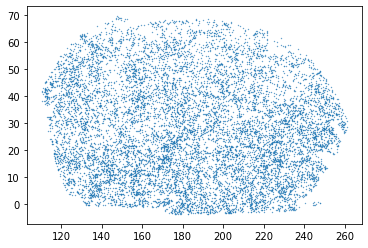

In [23]:
plt.scatter(target_new['ra'],target_new['dec'],s = 0.1)

## photo input

In [25]:
photo = Table.read("/home/yunzheng/PAC/code/sdss/photo/sdss_photo_bayes.fits")

In [26]:
photo

ra,dec,mass0p025,mass0p075,mass0p125,mass0p175,u_r0p025,u_r0p075,u_r0p125,u_r0p175
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
165.05813744869903,12.658418225367566,9.39215752465844,10.365839444230081,10.789834569385484,10.874948880525078,3.788880910643954,3.6279123243198343,3.455189537392683,3.100687580817959
165.06410464649366,12.630153571231624,9.465903456649093,10.408561774583392,10.837335479935613,10.982898640416007,2.9640450990334504,2.793715071464853,2.6639018929667353,2.4259583565414755
165.078514400517,12.654619548997042,9.217752361357253,10.164797780366774,10.575064237262291,10.726304922619034,2.8140979259140195,2.64617765024427,2.5136235295731946,2.3022265801506907
165.0782796173669,12.786074605842204,8.788546872293935,9.75330653822287,10.199753310723263,10.414907865746242,1.8045659661147149,1.6992388891081323,1.6623675098953117,1.599889625946373
165.087065009066,12.771798761490714,8.887922702401003,9.851158315446863,10.296648124458873,10.51544959192391,2.134060959315422,1.9759250994466313,1.9129204189271283,1.8214277358381425
165.08519044576474,12.773842887711803,8.462379778821727,9.390288581992595,9.787839329572236,9.916074684696811,2.8184054830001037,2.6357548471134877,2.4826864805493924,2.2487271486614597
165.0870370902121,12.775121556785786,8.626545451863446,9.59326393370332,10.004287100249492,10.123121827312733,3.1254475448945875,2.9993348691848127,2.8402317160582657,2.5409646347464783
165.09994890315772,12.776051826039817,8.425532369927948,9.387201555680202,9.806092628513307,9.93849197173749,3.002637299764217,2.874214576671136,2.7379863149360357,2.4803180932466686
165.1140415195643,12.67132833110127,9.751164837703751,10.695169404928583,11.118555634040906,11.263636432307706,3.083463609482572,2.9187728515964646,2.78136695006466,2.521407949661529


In [27]:
photo.sort("ra")

In [28]:
Table(photo).write("./photo.fits",overwrite = True)

In [29]:
photo   #22763173

ra,dec,mass0p025,mass0p075,mass0p125,mass0p175,u_r0p025,u_r0p075,u_r0p125,u_r0p175
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
109.73594943179447,41.08392961781185,7.64986227629582,8.584136145625202,9.008987419522187,9.225507500016736,1.4286196332803034,1.458693078075074,1.3708182930006552,1.2246058907567694
109.7484396093258,41.124034629638714,8.54294579639449,9.508673931606701,9.93069022615572,10.0428053156365,3.398665020032059,3.2419548093131705,3.0945129592727048,2.7900099202153394
109.75046871173305,41.12969305574254,8.794567998474596,9.756972109052327,10.176881656803642,10.268152086919185,3.5829803542582797,3.406777367104301,3.243430284870892,2.904761152253413
109.75256815554391,41.12522861153962,8.25198207554519,9.202350637684557,9.622560797553225,9.738674181928978,3.043835843333448,2.888318703856025,2.7391171074474494,2.446135529490518
109.76066484336958,41.15457200059703,10.538544408070132,11.454206576604697,11.838033331953888,12.00372642320239,2.505057990351725,2.3548725552098775,2.2509251337490106,2.0785941970005966
109.78380223509873,41.160278564987784,9.568451233170787,10.541484425868772,10.976381780689461,11.05567371520916,3.677177553525848,3.527586150575167,3.3900827498123087,3.07082939653798
109.78450008337647,41.196267691066325,8.09335094126173,9.03140641458697,9.444731276040056,9.573355404774434,2.772447446543116,2.610632304783052,2.471729353751844,2.2245753876862113
109.785447565614,41.20069184741169,7.8888990267690335,8.81579979928082,9.244127253824447,9.46882649840162,1.8677765827410724,1.730504421814085,1.6603488867358438,1.5473183593134243
109.78951614743217,41.15632383021246,8.500239180093809,9.469676181519683,9.894281550263504,10.00253079303929,3.485592967907488,3.333745437346211,3.1870011378571297,2.8814500442506406


## random1 catalogue

### spec 用nyu random

In [34]:
ran_nyu = Table.read("/home/yunzheng/PAC/code/PAC/0_0.2/random1.fits")

In [35]:
ran_nyu   #1765922

ra,dec,ILSS,EBV
float64,float64,int32,float32
109.840763,41.124918,440587,0.072443634
109.883547,41.29515,440588,0.07464737
109.893708,41.277101,440588,0.074014746
109.898785,41.080136,440587,0.06806475
109.909297,41.386125,441640,0.0762966
109.950144,41.436765,440589,0.07701286
109.965587,41.327208,440588,0.07476309
109.969827,41.487903,441640,0.07542439
109.977683,41.333461,440588,0.075009055


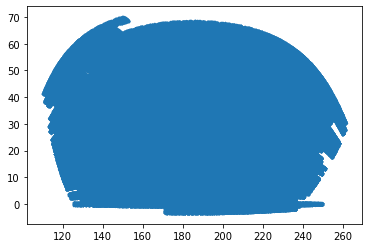

In [13]:
plt.scatter(ran_nyu['ra'],ran_nyu['dec'],s = 0.1)

In [36]:
Table(ran_nyu).write('./random1.fits')

## random2 catalogue

In [30]:
random = Table.read("/home/yunzheng/DPPAS/data/SDSS/final_catalogue/random/random.fits")

In [31]:
random    #35162351

ra,dec
float64,float64
141.175949,0.805305
228.84662,28.931461
150.059107,53.52489
172.480777,56.154151
247.419143,30.680918
223.706907,54.656669
114.084817,31.75226
250.170446,38.209831
177.039069,23.46599


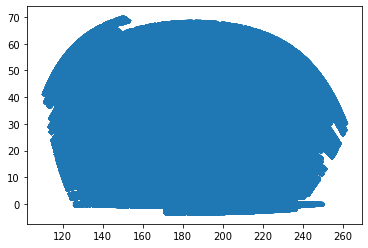

In [37]:
plt.scatter(random['ra'],random['dec'],s =0.1)

In [63]:
35162351/5000

7032.4702

In [32]:
random.sort("ra")

In [34]:
random    #35162351

ra,dec
float64,float64
109.735034,41.100867
109.741212,41.115936
109.748135,41.1241
109.7483,41.131579
109.753643,41.136296
109.756132,41.146848
109.758326,41.105432
109.765415,41.159672
109.768054,41.117904


In [35]:
random = random[::2]

In [36]:
random    #17581176

ra,dec
float64,float64
109.735034,41.100867
109.748135,41.1241
109.753643,41.136296
109.758326,41.105432
109.768054,41.117904
109.780747,41.145306
109.783445,41.191844
109.786318,41.173064
109.788852,41.189523


In [39]:
17581176/2500

7032.4704

In [38]:
Table(random).write("./random2.fits",overwrite = True)